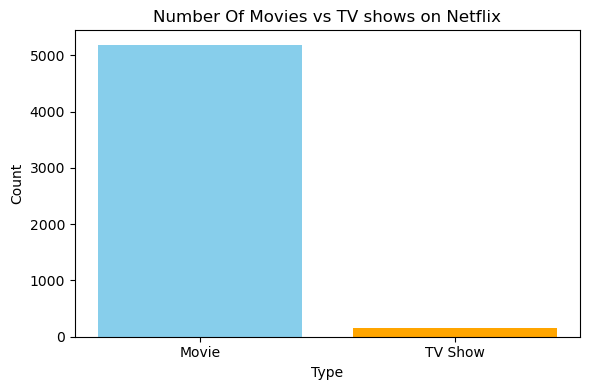

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv('netflix_titles.csv')
df=df.dropna(subset=['show_id', 'type', 'title', 'director', 'cast', 'country', 
                    'date_added','release_year', 'rating', 'duration', 'listed_in', 'description'])

type_counts=df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values,color=['skyblue','orange'])
plt.title("Number Of Movies vs TV shows on Netflix")
plt.xlabel("Type")
plt.ylabel('Count')
plt.tight_layout()
plt.savefig("movies vs tvshow.png")
plt.show()

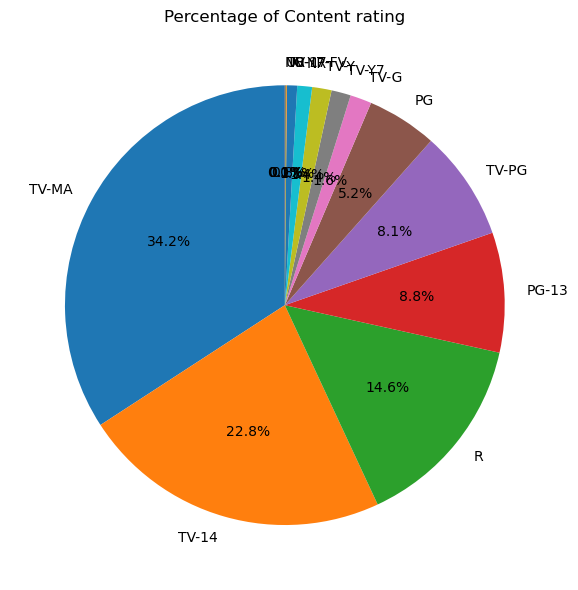

In [43]:
rating_counts=df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts,labels=rating_counts.index,autopct='%1.1f%%',startangle=90)
plt.title("Percentage of Content rating")
plt.tight_layout()
plt.savefig("content_rating.png")
plt.show()

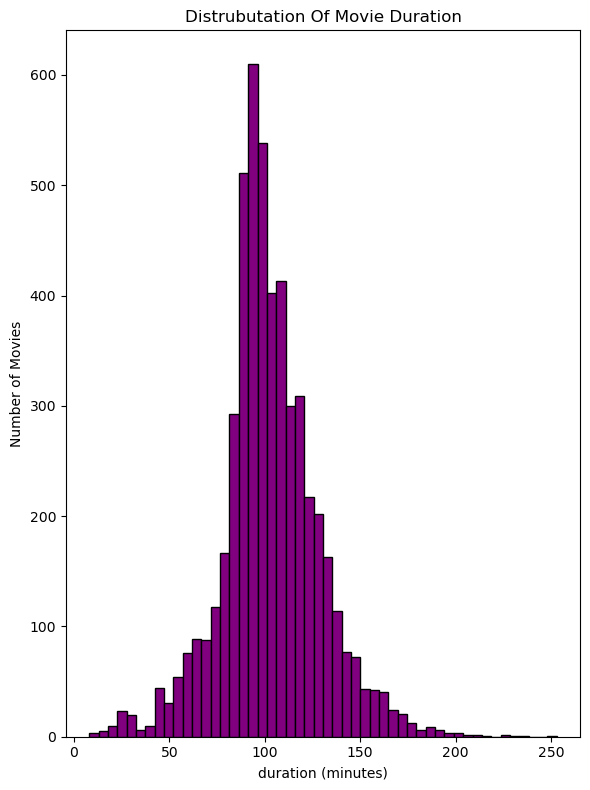

In [44]:
movie_df=df[df['type']=='Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min','').astype(int)
plt.figure(figsize=(6,8))
plt.hist(movie_df['duration_int'],bins=50,color='purple',edgecolor='black')
plt.title('Distrubutation Of Movie Duration')
plt.xlabel('duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('movie_duration_histogram.png')
plt.show()

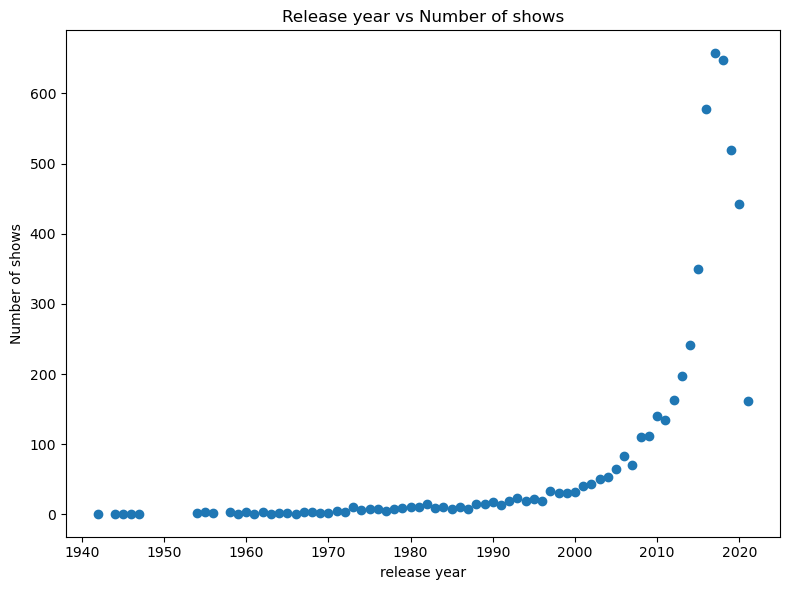

In [45]:
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(8,6))
plt.scatter(release_counts.index,release_counts.values)
plt.title('Release year vs Number of shows')
plt.xlabel('release year')
plt.ylabel('Number of shows')
plt.tight_layout()
plt.savefig('release_year_scatter.png')
plt.show()


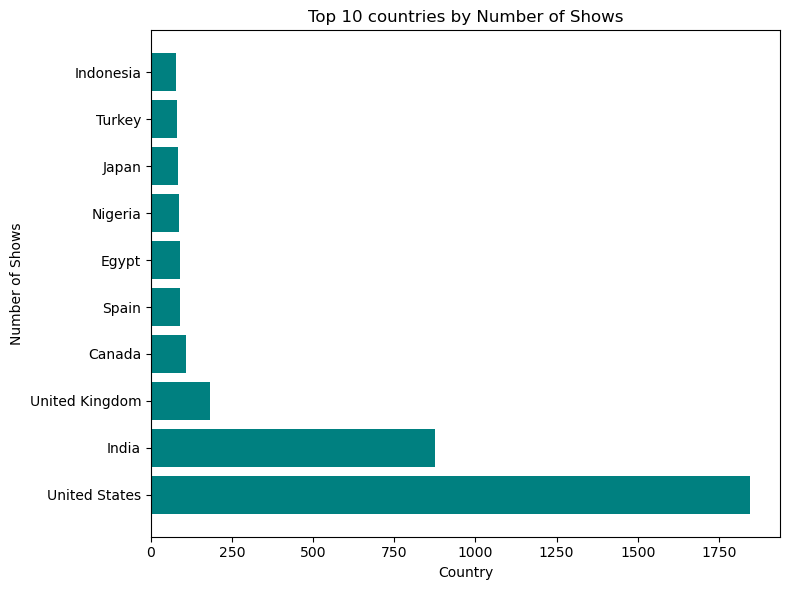

In [46]:
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index,country_counts.values,color='teal')
plt.title('Top 10 countries by Number of Shows')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('top_10countries.png')
plt.show()

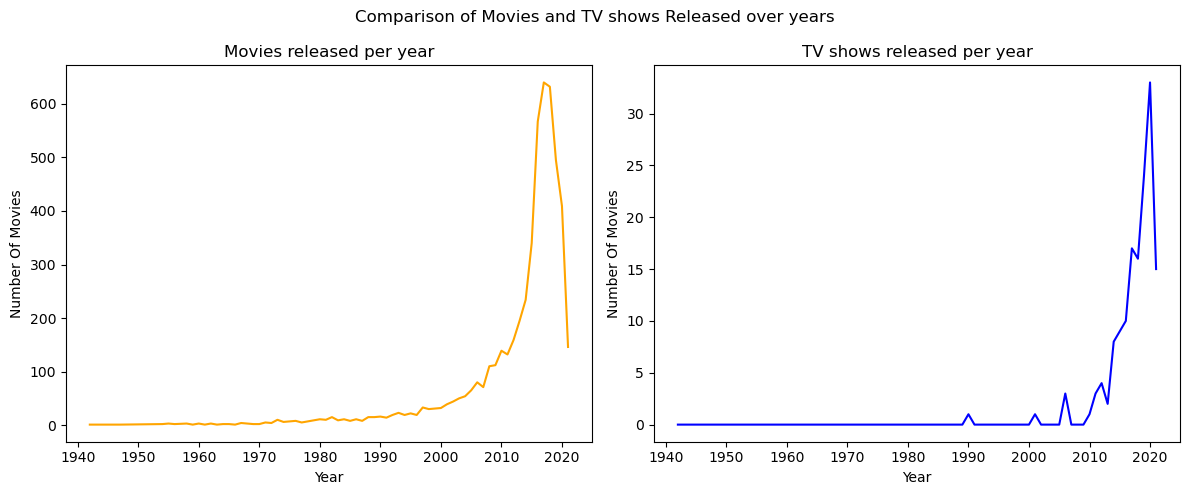

In [47]:
content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)
fig,ax=plt.subplots(1,2,figsize=(12,5))
#first_subplot
ax[0].plot(content_by_year.index,content_by_year['Movie'],color='orange')
ax[0].set_title("Movies released per year")
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number Of Movies')

#sencond_subplot
ax[1].plot(content_by_year.index,content_by_year['TV Show'],color='blue')
ax[1].set_title("TV shows released per year")
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number Of Movies')

fig.suptitle("Comparison of Movies and TV shows Released over years")
plt.tight_layout()
plt.savefig("movies_tv_comparison.png")
plt.show()